In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [np, pd, mpl, sns]:
    print(i.__name__, i.__version__)

numpy 1.18.5
pandas 0.25.1
matplotlib 3.5.3
seaborn 0.12.2


# 3-1 머신러닝(Machine Learning)

- **컴퓨터(연산 장치, Machine)**로 **명시적인 규칙(또는 프로그램)** 없이 데이터를 통해 **성능**을 향상시키는 방법을 연구하는 분야 


- **머신러닝 목표**: 실제 상황에서 다양한 데이터와 상황에 있어도 모델의 좋은 성능을 유지하도록 학습하는 것 → 일반화(Generalization)

## 0. 데이터셋 소개

### Abalone

[Abalone](https://archive.ics.uci.edu/dataset/1/abalone) 데이터셋: 전복의 생육 정보 데이터입니다.


|Name|Data Type|	Meas.|	Description|
|----|---------|-----|-----------|
|Sex|nominal||M, F, and I (infant)|
|Length|continuous|mm|Longest shell measurement|
|Diameter|continuous|mm|perpendicular to length|
|Height|continuous|mm|with meat in shell|
|Whole|continuous|grams|whole abalone|
|Shucked|continuous|grams|weight of meat|
|Viscera|continuous|grams|gut weight (after bleeding)|
|Shell|continuous|grams|after being dried|
|Rings|integer||+1.5 gives the age in years|

In [2]:
df_abalone = pd.read_csv('data/abalone.csv')
df_abalone.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 머신러닝 모델(Machine Learning Model)

- 데이터에서 추출한 지식(패턴)을 연산 장치(컴퓨터)에 근사화한 객체


- 주어진 데이터의 패턴을 학습하여 예측을 수행함

**[Ex.1]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

선형 회귀 모델: 선형 관계를 지니고 있는 데이터를 선형 함수로 근사화해 봅니다.

    
기울기가 1이고 절편이 5인 직선을 중심으로 형성된 100개의 임의의 데이터 포인트를 생성해봅니다.
 
</div>

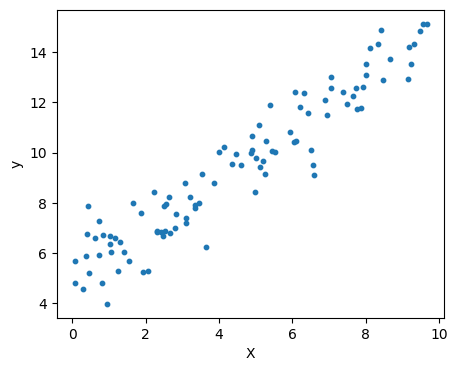

In [3]:
a, b= 1, 5
X = np.random.random(size=100) * 10
y = X * a + b + np.random.normal(size=100)
plt.figure(figsize=(5, 4))
plt.scatter(X, y, s=10)
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('y')
plt.show()

위와 같이 생성된 데이터를 직선으로 근사화 해보면,

기울기가 1이고 절편이 5인 직선이 됩니다. 이를 도식화하면 아래와 같습니다.

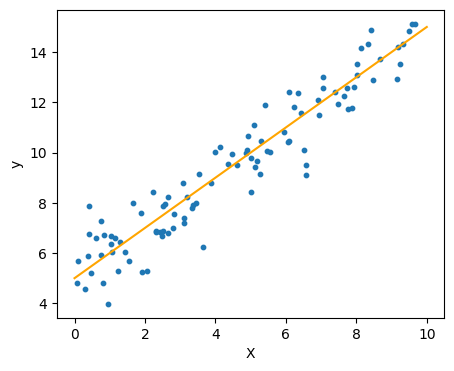

In [4]:
a, b = 1, 5
plt.figure(figsize=(5, 4))
plt.scatter(X, y, s=10)
plt.plot((0, 10), (a * 0 + b, a * 10 + b), c='orange')
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('y')
plt.show()

### 머신러닝 모델의 분류

#### 모수적 모델(Parametric Model)

- 주어진 데이터가 특정한 분포를 따른다고 가정환 뒤 예측을 수행합니다.

> 함수 관계로 데이터를 나타내고, 함수의 모수(계수, Coefficient, 가중치: Weight)를 데이터에 맞추어 데이터를 근사화 시킨 모델

> 선형 회귀 모델, 로지스틱 회귀 모델, 인공신경망

#### 비모수적 모델(Non-parametric Model)

- 데이터 분포에 대한 가정 없이, 주어진 데이터만을 사용하여 예측을 수행합니다.

> 의사 결정 나무(Decision Tree), K-최근접이웃(K-Nearest Neighbors), ...

## 손실(Loss)

- **근사화**에 의해 발생한 실제 데이터와의 오차를 정량화: 클수록 실제 데이터와 차이가 많이 남을 뜻합니다.


**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

Ex.1의 데이터에서 임의의 10개의 데이터 포인트를 뽑아 손실(loss)를 구해봅니다.
    
$\text{Absolute error} = |\hat{y} - y|$
    
$\text{Squared error} = (\hat{y} - y)^2$
</div>

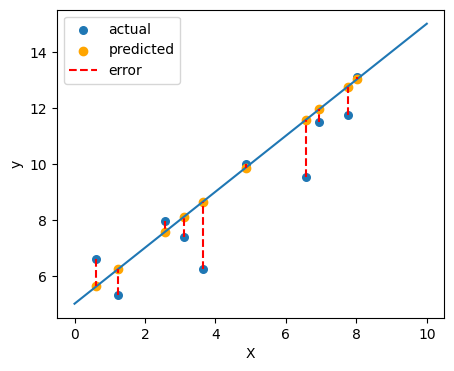

In [5]:
idx_10 = np.random.choice(np.arange(100), 10)
X2, y2 = X[idx_10], y[idx_10]
plt.figure(figsize=(5, 4))
plt.plot((0, 10), (a * 0 + b, a * 10 + b))
plt.scatter(X2, y2, s=30, label='actual')
plt.scatter(X2, X2 * a + b, color='orange', label='predicted')
plt.vlines(X2, y2, X2 * a + b, linestyles='dashed', color='red', label='error')
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('y')
plt.legend()
plt.show()

In [6]:
pd.DataFrame(
    {'X': X, 'y': y}
).assign(
    y_hat = lambda x: X * a + b
).assign(
    error = lambda x: x['y'] - x['y_hat'], # 오차
).assign(
    absolute_error = lambda x: x['error'].abs(),
    squared_error = lambda x: x['error'] ** 2
)

,X,y,y_hat,error,absolute_error,squared_error
0,9.670718,15.129283,14.670718,0.458565,0.458565,0.210282
1,2.235312,8.419003,7.235312,1.183692,1.183692,1.401126
2,6.427660,11.584343,11.427660,0.156684,0.156684,0.024550
3,8.021496,13.105599,13.021496,0.084102,0.084102,0.007073
4,7.733274,12.564551,12.733274,-0.168723,0.168723,0.028468
...,...,...,...,...,...,...
95,0.061704,4.804000,5.061704,-0.257704,0.257704,0.066412
96,7.652699,12.248774,12.652699,-0.403924,0.403924,0.163155
97,6.090756,10.447566,11.090756,-0.643190,0.643190,0.413693
98,7.056528,13.017299,12.056528,0.960771,0.960771,0.923080


## 학습(Learning, Train) 

머신러닝 모델의 손실(Loss)을 줄이는 과정입니다.

### 지도학습(Supervised Learning)

입력 데이터(Input data)로 대상 데이터(Target data)를 나타낼 때 손실을 줄이는 과정입니다.

> 대상 데이터에 대한 예측을 출력합니다.
> 
> 지도학습 모델은 입력 데이터에서 대상 데이터를 예측하기 위한 지식(패턴)을 지니고 있습니다.

대상 데이터의 종류에 따라 구분됩니다.

1. **분류(Classification)**: 대상 데이터가 범주형

- 모델의 예측값과 실제 클래스 사이의 오분류를 줄이는 방향으로 학습하는 작업입니다.

<div style="padding: 5px; margin-left: 25px;">

**손실(Loss)**
    
- $\text{cross entropy} = -\frac{1}{n}\sum_{i=1}^ny_ilog(\hat{y_i})$, $\hat{y_i}$: i 클래스일 확률, $y_i$: i 클래스 여부

    
- $\text{binary cross entropy} = -y_ilog{\hat{y_i}} - (1-y_i)log{(1 - \hat{y_i})}$, $\hat{y_i}$: i클래스일 확률, $y_i \in \{0, 1\}$: i의 클래스 

</div>

2. **회귀(Regression)**: 대상 데이터가 수치형

- 모델의 예측값과 실제 정답값 사이의 차이를 줄이는 방향으로 학습하는 작업입니다.

<div style="padding: 5px; margin-left: 25px;">
    
**손실(Loss)** 

- $\text{Mean Squared Error} = \frac{1}{n}\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2$
    
</div>

### 비지도 학습(Unsupervised Learning)

데이터를 모델로 나타낼 때 손실을 줄이는 과정입니다.

> 비지도학습 모델은 데이터를 효과적으로 나타내기 위한 지식(패턴)을 지니고 있습니다.

비지도 학습 모델이 나타내는 데이터에 따라 아래와 같이 구분 됩니다.

1. 군집화(Clustering): 주어진 데이터들을 비슷한 그룹으로 묶는 작업입니다.


2. 차원축소(Dimension reduction): 고차원 데이터를 저차원의 데이터로 변환하는 작업입니다.


3. 속성 추출(Feature extraction): 데이터의 복잡한 특성을 간결하고 유용한 형태로 변환하는 작업입니다.


4. 이상치 탐지(Outlier detection): 데이터의 이상치 여부를 확인하고 식별하는 작업입니다.

##  지표(Metric)

- **머신러닝** 모델의 성능을 나타내는 기준

### 분류 지표

#### 이진 분류(Binary-class Classification)

|지표|설명|
|---|:----:|
|정확도(Accuracy)|$$\frac{TP + TN}{TP + FN + TN + FP}$$|
|정밀도(Precision)|$$\frac{TP}{TP + FP}$$|
|민감도(Sensitivity), 재현율(Recall)|$$\frac{TP}{TP + FN}$$|
|특이도(Speicificity)|$$\frac{TN}{TN + FP}$$|
|F1-score|$$\frac{2×Precision×Recall}{Precision＋Recall}$$|
|AUC(Area Under reciver chacteristic Curve)|ROC 커브의 하부 면적|

|예측＼실제|Positive|Negative|
|--|--|--|
|Positive|TP(True Positive)|FP(False Positive)|
|Negative|FN(False Negative)|TN(True Negative)|

#### 다중 클래스 분류(Multi-class Classification)

- 정밀도, 재현율, F1-score 같이 Positive Class를 기준으로 측정하는 지표는 다중 클래스에서는 Positive class를 정하는 방법과, 여러 개의 Positive Class를 사용하여 점수를 낼 경우 이를 집계하는 방법을 지정할 필요가 생깁니다.

<div style="padding: 5px; margin-left: 25px;">

1. Positive / Negative class를 지정하는 방법에 따른 구분

- **OVR**(One-vs-Rest): Positive class외에 나머지는 Negative Class로 지정합니다.

    
- **OVO**(One-vs-One): Positive class와 Negative class를 개별로 지정합니다.

</div>

<div style="padding: 5px; margin-left: 25px;">

2. Positive/Negative class의 경우가 여러 가지 있다면, 각 클래스별 평균을 내는 방법에 따라구분됩니다.

- **Macro**: 클래스의 비율에 따른 가중 평균으로 계산, Macro Recall, Macro Precision, ... 

    
- **Micro**: 클래스의 비율과 관계없이, 각 클래스별 평균으로 계산: Micro Recall,  Micro Precision, ...

</div>

### 회귀 지표

|지표|설명|
|----|:----|
|평균제곱오차(MSE, Mean Squared Error)|$$\frac{1}{n}\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2$$|
|평균절대오차(MAE, Mean Absolute Error)|$$\frac{1}{n}\sum_{i=1}^n|y_i - \hat{y_i}|$$|
|평균절대비율오차(MAPE, Mean Absolute Percentage Error)|$$\frac{100}{n}\sum_{i=1}^n|\frac{y_i - \hat{y_i}}{y_i}|$$|
|R2 점수(R squared score)|$$1 - \frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{\sum_{i=1}^n\left(y_i - \bar{y}\right)^2}$$|


### 군집화 지표

|지표|설명|
|----|:----|
|중심거리제곱합(Inertia, Sum of Squared error)|$$\text{Inertia} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} ||x_{ij} - c_i||^2$$<br/>$k$: 군집 수<br/>$n_i$: $C_i$의 데이터 포인트 수<br/>$x_{ij}$: $C_i$의 j번째 데이터 포인트<br/>$c_i$: $C_i$ 의 중심(평균)입니다<br/>|
|실루엣 점수(Silhoutte score)|$$S(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$<br/>S(i):i의 실루엣 계수<br/>a(i): 같은 군집 내의 모든 다른 포인트와의 평균 거리<br/>b(i): 가장 가까운 이웃 클러스터에 속한 모든 포인트와의 평균 거리<br/>$$\text{Silhouette Score} = \frac{1}{N} \sum_{i=1}^{N} S(i)$$|
|던 지표(Dunn index)|$$\text{Dunn Index} = \frac{\min_{i \neq j} \left( \min_{x \in C_i, y \in C_j} d(x, y) \right)}{\max_{k} \left( \max_{x, y \in C_k} d(x, y) \right)}$$<br/>$C_i,C_j,C_k$: 각각 클러스터를 나타냅니다.<br/>$d(x,y)$: x, y 의 거리
|

## 평가(Test)

- 머신러닝의 과제의 목표를 효과적으로 나타낼 수 있는 지표를 선택합니다.


- 데이터를 학습 데이터(Train data)와 평가 데이터(Test data)로 구성합니다.


- 머신러닝 모델이 사용이 되는 상황을 고려하여 구성됩니다.

> 주식 가격 예측: 주식 가격은 과거의 데이터를 바탕으로 앞으로의 주식 가격을 예측합니다. → 특정 시점을 기준으로 이전은 학습 데이터로 이후는 평가 데이터로 구성합니다.

> 신제품 수요 예측: 신제품은 데이터가 축적이 되지 않은 상태입니다. → 평가 데이터는 학습 데이터에 등장하지 않은 제품의 데이터로 구성합니다.

## 검증(Validation)

머신러닝을 평가했을 때의 예상 성능을 가늠해보는 과정입니다.
→ 검증의 결과가 평가의 결과와 유사할 수록 좋은 검증입니다.

검증의 전략: 평가 방법의 특성을 반영하여 검증 방법 을 구성합니다.

검증법
----

학습 데이터를 **검증용 학습데이터**와 **검증용 평가데이터(검증 데이터)**를 선택 방법과 검증을 진행 방법하는 따라 구분됩니다.

### 선택 방법

#### 계층적 선택법(Stratified Selection)

- 분류 데이터셋에서 검증용 학습데이터와 검증용 평가데이터를 구성할 때 대상 데이터(target)의 분포를 양쪽에 동일하게 구성합니다.

#### 그룹화 선택법(Grouped Selection)

- 범주형 데이터를 기준으로 검증용 학습 데이터에는 등장하지 않는 범주를 검증용 평가 데이터에 구성합니다.

#### 시계열 선택법(Time Series Selection)

- 데이터의 시점을 T 시점 기준으로 T 시점 이전을 검증용 학습 데이터에 T 시점 이후를 검증용 평가 데이터로 구성합니다.

### 진행 방법

#### 홀드아웃 검증(Holdout Validation)

1. 검증용 학습데이터와 검증용 평가데이터로 나눕니다.


2. 검증용 학습데이터로 모델을 학습시키고 검증용 평가 데이터로 성능을 측정합니다.

#### 교차 검증(Cross Validation)

- 데이터를 여러 개의 폴드(겹, fold)로 나누고 각 폴드를 한 번씩 검증용 평가 데이터로 정합니다.


- 폴드 수만큼 나온 검증 결과를 평균을 내어 성능을 측정합니다.


- 교차 검증은 폴드의 수만큼 학습과 검증이 되기 때문에 데이터가 상대적으로 적거나 변인이 많아 정교한 검증이 요구가 될 경우 채택을 합니다.


- 변인이 많은 상황에서 신뢰도 높은 검증을 하고자 할 경우에 교차검증을 여러 번 진행하기도 합니다.


**과정**

1. 데이터를여러 개의 겹(폴드, fold)으로 나누고 각 폴드를 한 번씩 검증용 평가 데이터로 정합니다.


2. 폴드의 수만큼 나온 측정결과를 평균을 내어 성능을 측정합니다.


## 모델 선택

### 모델의 선택 과정


1. 검증 방법 정의 및 구현


2. 모델 제작

<div style="margin-top: 10px; margin-left: 25px">

데이터 전처리 → 속성 공학 → 모델 정의
    
</div>

3. 검증 및 결과 분석 


4. 2~3 단계를 반복하면서 모델 선별


5. 전체 학습 데이터로 재학습

**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_abalone으로 abalone(전복)의 성별(Sex)을 맞추는 머신러닝 모델과제를 위한 평가 데이터를 만듭니다.

**평가 요건**

평가 데이터는 성비를 맞추어 전체 데이터에서 20%를 임의(동일한 구성을 보장하기 위해 Random Seed를 고정시킵니다.)로 뽑습니다. 

학습데이터는 df_train, 테스트데이터는 df_test로 저장합니다. df_test에서 성별(Sex) 컬럼을 뽑아 내어 s_ans로 따로 저장하고, df_test에서는 컬럼을 삭제합니다.
    
</div>

In [7]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_abalone, test_size=0.2, stratify=df_abalone['Sex'], random_state=123)

**[Ex.3]**

df_abalone 데이터의 성별(Sex)을 예측하는 머신러닝 모델을 만들어봅니다.

평가 지표는 정확도(Accuracy)입니다.

검증과정을 정의하고 구현해보고,

학습데이터 df_train으로 성별을 구분하는 여러 모델을 자유롭게 만들어 검증을 해봅니다.

모델의 성능을 df_test로 평가합니다.

In [8]:
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

y_target = 'Sex'
# 입력 변수를 정의합니다.
X_cols = [i for i in df_train.columns if i != y_target]
# 5-fold 층화 교차 검증 Splitter를 설정합니다.
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

def eval_model(clf):
    """
    모델의 성능을 검증합니다. 
    Parameters:
        clf: Classifier
            분류기 인스턴스
    Returns:
        학습 평균, 학습 표준편차, 검증 평균, 검증 표준편차
    """
    result = cross_validate(clf, df_train[X_cols], df_train[y_target], cv=cv, scoring='accuracy', return_train_score=True)
    return np.mean(result['train_score']), np.std(result['train_score']), np.mean(result['test_score']), np.std(result['test_score'])

def test_model(clf):
    """
    모델을 평가합니다.
    Parameters:
        clf: Classifier
            분류기 인스턴스
    Returns:
        평가 결과 (Accuracy)
    """
    prd = clf.predict(df_test[X_cols])
    return accuracy_score(df_test['Sex'], prd)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# 로지스틱 회귀 모델을 만들어 검증해봅니다.

# StandardScaler → LogisticRegression
clf_lr = make_pipeline(
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', multi_class='multinomial') # 다중 클래스 확률을 softmax로 계산토록합니다.
)
eval_model(clf_lr)

(0.5706377489717693,
 0.0025117044396221083,
 0.5662886559707545,
 0.01286315145162258)

In [10]:
# 로지스틱 회귀 모델을 전체 학습 데이터로 학습하고, 평가해봅니다.
clf_lr.fit(df_train[X_cols], df_train[y_target])
test_model(clf_lr)

0.5299043062200957

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest 모델을 만들어 검증해봅니다.
clf_rf = RandomForestClassifier(n_estimators=300, max_depth=7, random_state=123)
eval_model(clf_rf)

(0.7624965151051286,
 0.005915177388537954,
 0.5626882214319154,
 0.017037374520945774)

In [12]:
# Random Forest 모델을 전체 학습 데이터로 학습하고, 평가해봅니다.
clf_rf.fit(df_train[X_cols], df_train[y_target])
test_model(clf_rf)

0.5430622009569378

In [13]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier를 clf_lr(Logistic Regression)과 clf_rf(Random Forest)로 구성합니다.
clf_vt = VotingClassifier([
    ('lr', clf_lr),
    ('rf', clf_rf)
], voting='soft')
eval_model(clf_vt)

(0.6765942879142044,
 0.002459365555234087,
 0.5653833011626678,
 0.01151139827582167)

In [14]:
# Voting Classifier를 전체 학습 데이터로 학습하고, 평가합니다.
clf_vt.fit(df_train[X_cols], df_train[y_target])
test_model(clf_vt)

0.5358851674641149

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_abalone으로 abalone(전복)의 연령(Rings)을 맞추는 머신러닝 모델과제를 위한 평가 데이터를 만듭니다.
    
**평가 요건**

평가 데이터는 성별(Sex)이 I(Infant)인 것으로만 구성하고, 학습 데이터는 성별이 I가 아닌 것으로 구성합니다.

학습데이터는 df_train2, 테스트데이터는 df_test2로 저장합니다. 

</div>

In [15]:
df_train2 = df_abalone.loc[df_abalone['Sex'] != 'I']
df_test2 = df_abalone.loc[df_abalone['Sex'] == 'I']

**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

학습데이터 df_train2으로 연령(Rings)을 맞추는 모델을 자유롭게 만들어봅니다.

평가 지표는 평균제곱오차(MSE, Mean Squared Error)입니다.

검증과정을 정의하고 구현해보고,

학습데이터 df_train으로 연령(Rings)을 구분하는 여러 모델을 자유롭게 만들어 검증을 해봅니다.

모델의 성능을 df_test로 평가합니다.
    
</div>

In [16]:
from sklearn.model_selection import GroupKFold
y_target2 = 'Rings'
grp = 'Sex'
X_cols2 = [i for i in df_train2.columns if i != y_target2 and i != grp]
# 등장하지 않는 성별이 Test에 나오므로, 검증시 성별을 달리하여 검증 train과 검증 test로 나뉘도록 하기 위해 GroupKFold를 씁니다.
cv2 = GroupKFold(n_splits=2)

def eval_model2(reg):
    """
    그룹화 교차 검증을 통한 모델의 성능을 검증합니다. 
    Parameters:
        clf: Classifier
            분류기 인스턴스
    Returns:
        학습 평균, 학습 표준편차, 검증 평균, 검증 표준편차
    """
    # groups=df_train2[grp] grp(성별)을 기준으로 나뉘도록 설정합니다.
    result = cross_validate(
        reg, df_train2[X_cols2], df_train2[y_target2], 
        cv=cv2, groups=df_train2[grp], scoring='neg_mean_squared_error', return_train_score=True
    )
    return np.mean(result['train_score']), np.std(result['train_score']), np.mean(result['test_score']), np.std(result['test_score'])

def test_model2(reg):
    """
    모델을 평가합니다.
    Parameters:
        clf: Classifier
            분류기 인스턴스
    Returns:
        평가 결과 (Accuracy)
    """
    prd = reg.predict(df_test2[X_cols2])
    return mean_squared_error(df_test2['Rings'], prd)

In [17]:
from sklearn.linear_model import LinearRegression

reg_lr = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
eval_model2(reg_lr)

(-5.658948736875658,
 0.5301771902953765,
 -5.932594716298191,
 0.5366537551139832)

In [18]:
reg_lr.fit(df_train2[X_cols2], df_train2[y_target2])
test_model2(reg_lr)

4.609174708960933

In [19]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(n_estimators=300, max_depth=7, random_state=123)
eval_model2(reg_rf)

(-3.0299508606178334,
 0.43225112523057496,
 -5.746277817835207,
 0.6302849459652262)

In [20]:
reg_rf.fit(df_train2[X_cols2], df_train2[y_target2])
test_model2(reg_rf)

4.044116723974344

In [21]:
from sklearn.ensemble import VotingRegressor

reg_vt = VotingRegressor([
    ('lr', reg_lr),
    ('rf', reg_rf)
])
eval_model2(reg_vt)

(-4.030321012231051,
 0.48598139652502526,
 -5.510750554251789,
 0.5910460769415846)

In [22]:
reg_vt.fit(df_train2[X_cols2], df_train2[y_target2])
test_model2(reg_vt)

4.05088058268311

머신러닝의 과정
-------------------

**1. 문제 정의** 

**2. 데이터 수집**

**3. 문제 분석** 

**4. 데이터 클린징** 

**5. 모델 선택**

**6. 모델 평가** 

**7. 평가 결과 분석** 

**8. 개선점 도출 후 1~6 단계로 이동**